<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Kmeans_image_comparison_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files
import random
import cv2 
import matplotlib.image as mpimg

In [171]:
from google.colab import drive #to import the google drive data

In [172]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [174]:
im = cv2.imread('Meet.jpg')

In [175]:
im

array([[[107, 147, 166],
        [ 91, 134, 153],
        [ 71, 121, 143],
        ...,
        [ 84, 111, 131],
        [ 57,  84, 104],
        [ 79, 106, 126]],

       [[108, 145, 165],
        [104, 146, 165],
        [ 76, 126, 146],
        ...,
        [ 93, 118, 138],
        [ 66,  91, 111],
        [ 82, 107, 127]],

       [[116, 151, 171],
        [101, 141, 160],
        [ 91, 136, 157],
        ...,
        [ 96, 120, 140],
        [ 70,  94, 114],
        [ 78, 102, 122]],

       ...,

       [[124,  81,   2],
        [130,  87,   6],
        [131,  88,   7],
        ...,
        [ 60,  40,   0],
        [ 54,  35,   0],
        [ 53,  34,   0]],

       [[113,  71,   0],
        [116,  74,   0],
        [128,  87,   8],
        ...,
        [ 61,  41,   0],
        [ 55,  36,   0],
        [ 54,  35,   0]],

       [[123,  83,   8],
        [103,  64,   0],
        [106,  64,   0],
        ...,
        [ 61,  41,   0],
        [ 55,  36,   0],
        [ 54,  35,   0]]

In [176]:
im.shape

(100, 100, 3)

In [177]:
im = (im/255).reshape(100*100,3)

In [178]:
im

array([[0.41960784, 0.57647059, 0.65098039],
       [0.35686275, 0.5254902 , 0.6       ],
       [0.27843137, 0.4745098 , 0.56078431],
       ...,
       [0.23921569, 0.16078431, 0.        ],
       [0.21568627, 0.14117647, 0.        ],
       [0.21176471, 0.1372549 , 0.        ]])

In [179]:
#function to calculate distance 
def calc_distance(X1,X2):
    return ((sum(X1-X2)**2)**0.5)


In [ ]:
# funcation to calculate closest centoids
def findclosestcentroid(c,X):
    assign_centroids=[]
    for i in X:
        distance_list=[]
        for j in c:
            distance_list.append(calc_distance(i,j))
        assign_centroids.append(np.argmin(distance_list))
    return assign_centroids



In [ ]:
# function to calculate centroids
def calc_centroids(cluster,X):
    new_centroid = []
    new_df1 = pd.concat([pd.DataFrame(X),pd.DataFrame(cluster,columns=['clusters'])],axis=1)
    for c in set(new_df1['clusters']):
        current_cluster = new_df1[new_df1['clusters']==c][new_df1.columns[:-1]]        
        current_mean = current_cluster.mean(axis=0)
        new_centroid.append(current_mean)
    return new_centroid

In [180]:
n=15    #number of epochs needed

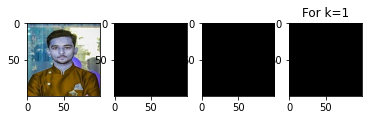

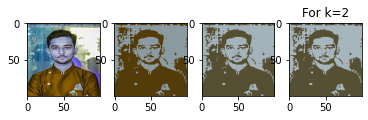

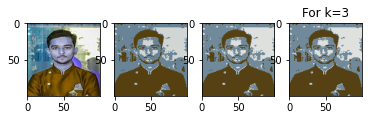

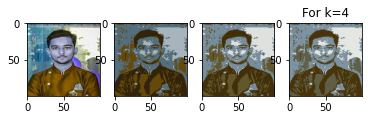

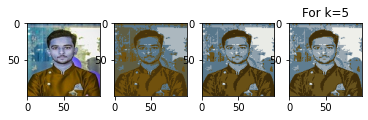

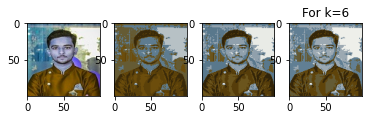

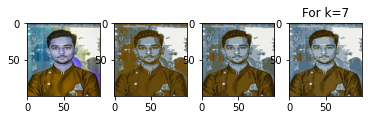

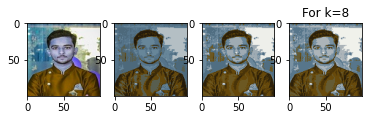

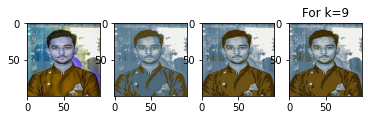

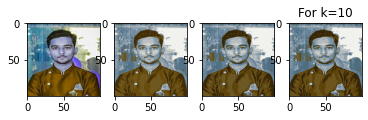

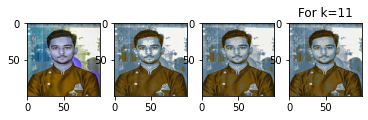

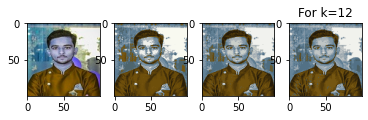

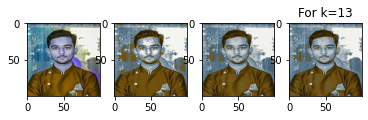

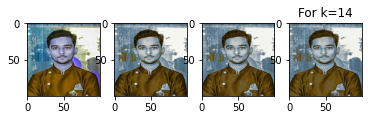

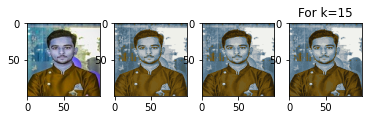

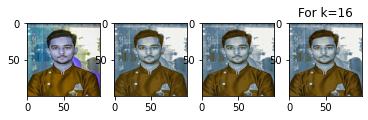

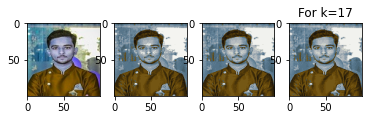

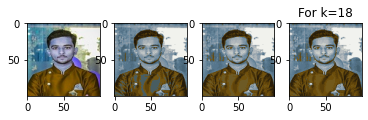

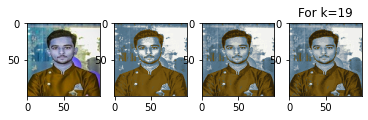

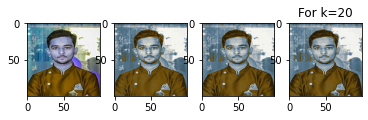

In [181]:
 for k in range(1,21):
    im = (im/255).reshape(100*100,3)

    centroid_1 = random.sample(range(0,len(im)),k)
    centroid=[]
    for i in centroid_1:
        centroid.append(im[i])

    centroid = np.array(centroid)
  

    centroids_for_display_epochs=[]
    for i in range(n):
       
        get_centroid = findclosestcentroid(centroid,im)     
        centroid = calc_centroids(get_centroid,im)
        if(i==0):
            centroids_for_display_epochs.append(centroid)
        if(i==n//2):
            centroids_for_display_epochs.append(centroid)

  # Output image which 3 different values of N and different value of K
    output_1 = im.copy()
    for i in range(len(im)):
        output_1[i] = centroids_for_display_epochs[0][get_centroid[i]]
    output_1_plot = output_1.reshape(100,100, 3)

    output_2 = im.copy()
    for i in range(len(im)):
        output_2[i] = centroids_for_display_epochs[1][get_centroid[i]]
    output_2_plot = output_2.reshape(100,100, 3)

    output_3 = im.copy()
    for i in range(len(im)):
        output_3[i] = centroid[get_centroid[i]]
    output_3_plot = output_3.reshape(100,100, 3)

    im = cv2.imread('Meet.jpg')
    fig,ax = plt.subplots(1,4)
    plt.title('For k='+str(k))
    ax[0].imshow(im)
    ax[1].imshow(output_1_plot)
    ax[2].imshow(output_2_plot)
    ax[3].imshow(output_3_plot)



# Here As we can see that for value of K=9 we are getting correct output image.